#  Distributions

The field of Statistics is, more or less, the study of [distributions](https://en.wikipedia.org/wiki/Probability_distribution).  A distribution is, stringly speaking, a function describing the probability of an event occuring for each of the possible options in a [population](https://en.wikipedia.org/wiki/Statistical_population).  

Here's a simple example: if I were to roll a die, I have a 1/6 chance of rolling any one of the numbers:

In [1]:
import random
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
def roll_die():
    return random.randrange(1, 7)

NUMBER_OF_ROLLS = 1000
rolls = [] 
for i in range(NUMBER_OF_ROLLS):
    rolls.append(roll_die())
    
print(*rolls[:10], '...', sep=', ')

2, 2, 3, 4, 3, 6, 4, 4, 6, 6, ...


So we rolled a die 1000 times.  What did we get in total?  Let's aggregate it using a [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) from Python's extremely helpful [collections](https://docs.python.org/3/library/collections.html) module.

In [3]:
rolls_aggregated = Counter(rolls)
rolls_aggregated

Counter({1: 167, 2: 146, 3: 168, 4: 192, 5: 151, 6: 176})

That's pretty helpful, but let's visualize it.

(array([ 167.,  146.,  168.,  192.,  151.,  176.]),
 array([ 1.        ,  1.83333333,  2.66666667,  3.5       ,  4.33333333,
         5.16666667,  6.        ]),
 <a list of 6 Patch objects>)

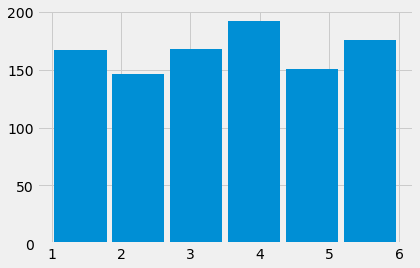

In [4]:
plt.hist(rolls, bins=6, rwidth=0.9)

This is one of the simplest of distributions: as long as we have a fair die, there is a 1/6 chance of getting any of the numbers.  However, a distribution should be a function mapping possible values to *probabilities*, not raw numbers of occurrences like above.  So we need to *normalize* to make sure that the areas of each rectangle add up to 1:

0.167, 0.146, 0.168, 0.192, 0.151, 0.176


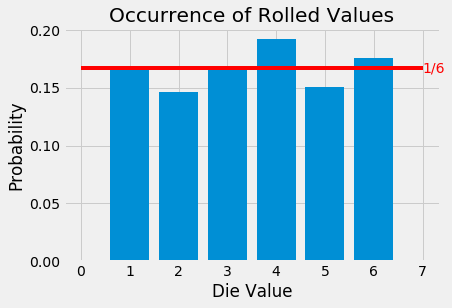

In [5]:
occurrence_percentages = [value / NUMBER_OF_ROLLS for value in rolls_aggregated.values()]
print(*occurrence_percentages, sep=', ')

plt.bar([1,2,3,4,5,6], occurrence_percentages)
plt.title("Occurrence of Rolled Values")
plt.ylabel("Probability")
plt.xlabel("Die Value")

plt.plot([0, 7], [1/6, 1/6], color='red')
plt.text(7, .163, '1/6', color='red')

plt.show() # hide the default matplotlib output

This is the standard picture for a [Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution): every possible element is equally possible.

## Normal distribution
Most people have heard of the [Normal or Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution).  What is it?  Well, the normal distribution maps numbers on the whole real line to probabilities using the function 

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}},$$

where: 
* $\mu$ is the mean of the distribution,
* $\sigma$ is the standard deviation of the distribution, (so $\sigma^2$ is the variance).

The *standard normal distribution* has $\mu = 0$ and $\sigma = 1$, simplifying the equation to:

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2}.$$

While that's not a terribly complicated equation, it probably still feels like it comes from nowhere.  Here's what it looks like, the so-called "bell curve":

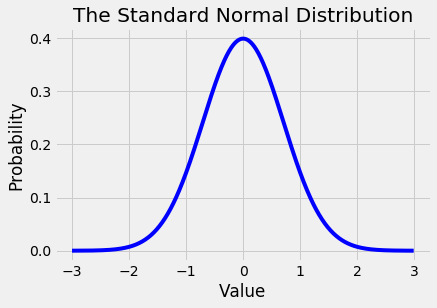

In [6]:
def f(x):
    return 1 / math.sqrt(2 * math.pi) * math.exp(-1 * x * x)

# generate some data to draw the line
X = np.arange(-3,3,.01)
Y = [f(x) for x in X]

plt.plot(X, Y, color='blue')

plt.title("The Standard Normal Distribution")
plt.ylabel("Probability")
plt.xlabel("Value")

plt.show() # hide the default matplotlib output

(*Side note:* if you think about this enough, it's clear that the distribution in this example doesn't actually map possible values to the probability of them occurring.  For example, pick 20 numbers near 0 and sum their probabilities, the answer you get is more than 1!  You need to be a little bit more careful when you have infinitely many possible inputs, as we do here.)

## Why is the normal distribution so famous?

The typical answer to this is "Because so many populations lie on a normal distribution in nature".  For example, the height of male adults is (approximately) normally distributed, as is the weight of cheetah femurs, or flapping rate of hummingbirds (probably...I haven't actually checked).  But this is just passing the buck: *Why are so many populations normally distributed?* The answer is the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), as we'll discuss next.

Instead of simply rolling one die, let's roll 2 dice and take their sum.

In [7]:
def roll_dice(n=2):
    return sum([roll_die() for i in range(n)])

The difference here is that the middle values are more likely:  If I want to roll the smallest value, `2`, in my new  example, I need to roll two `1`s and sum them.  However, if I wanted to roll an average sum, say `7`, I could roll:
* a `1` and a `6` (or a `6` and a `1`),
* a `2` and a `5` (or a `5` and a `2`), or 
* a `3` and a `4` (or a `4` and a `3`).

Let's visualize this.

In [8]:
# This function is all of our previous cells grouped together.  It is often helpful to go 
# back and regroup cells into more reusable code.
def visualize_dice_rolls(number_of_dice=2, number_of_rolls=NUMBER_OF_ROLLS):
    rolls = [] 
    for i in range(number_of_rolls):
        rolls.append(roll_dice(number_of_dice))

    rolls_aggregated = Counter(rolls)
    occurrence_percentages = [value / number_of_rolls for value in rolls_aggregated.values()]
    
    X = list(rolls_aggregated.keys())
    plt.bar(X, occurrence_percentages)
    plt.title("Occurrence of Rolled Values")
    plt.ylabel("Probability")
    plt.xlabel("Die Value")

    # Plot a line at the average value
    plt.plot([number_of_dice - 1, number_of_dice * 6 + 1], 
             [1/(number_of_dice * 6) , 1/(number_of_dice * 6)], color='red')
    
    # Plot a normal curve
    mean = number_of_dice * 5 / 2 + number_of_dice
    std = statistics.stdev(rolls)
    
    normal = lambda x: 1 / math.sqrt(2 * math.pi * std * std) * math.exp(-1 * ((x - mean)**2) / (2 * std * std))
    X_e = np.arange(number_of_dice - 1, number_of_dice * 6 + 1,.01)
    Y = [normal(x) for x in X_e]
    
    plt.plot(X_e, Y, color='blue')
    
    plt.show() # hide the default matplotlib output

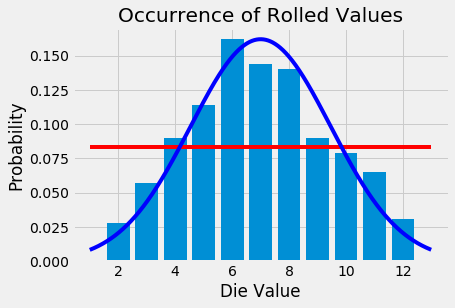

In [9]:
# Play around with a few values in here!
visualize_dice_rolls(number_of_dice=2, number_of_rolls=1000)

This is the main idea behind the central limit theorem: *the more you take averages, the more your distribution approaches normal*.  So then, why (roughly speaking) should we expect nature to keep things normally distributed?  Because there are many "averaging" effects in the world, such as genetic combination from (sexual) reproduction.

There are many other distributions that show up in Statistics, and you're not going to become an expert in all of them, but it's always helpful to keep an open mind about learning more.  

To wrap up, here's one of my favorites: the [Zipfian Distribution](https://en.wikipedia.org/wiki/Zipf%27s_law).  Zipf's law states (among other things) that if you create an ordered list of the most commonly occurring words in a natural language, the frequency of words appearing in the language is inversely proportional to its *rank* in that list: the most common word will occur twice as often as the next word, and the third most common word will occur a third as often as the most common word, *etc.*  For example in English, the most common word `"the"` occurs as $7\%$ of words, and the second-most common word `"of"` occurs $3.5\%$ on the time.